# Ridge and Lasso
- Predict Wine Quality with Regularization
- Predict alchohol level with Regularization

Data Source: [
Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)


***

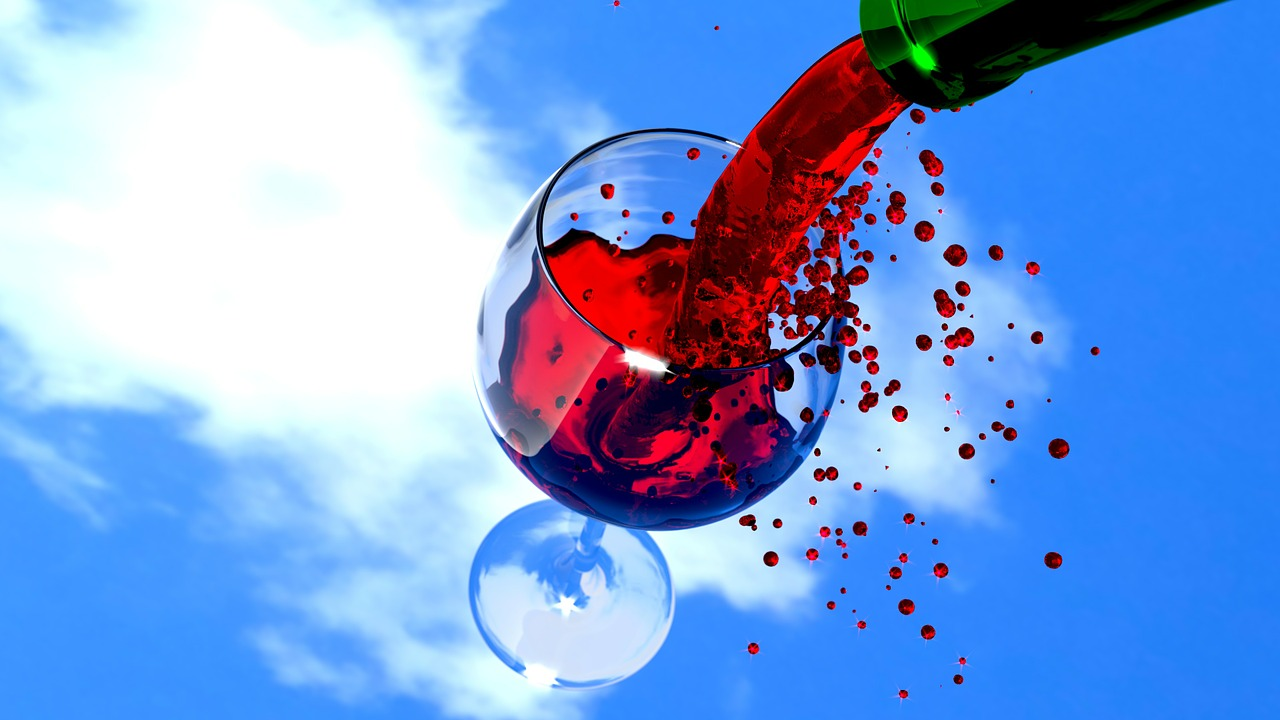

The original dataset has a 1-10 rating for each wine, we’ve made it a classification problem with a wine quality of good (>5 rating) or bad (<=5 rating). The goals of this project are to:

1. Implement Ridge and Lasso regularization both for logistic and linear regression.
2. Find the best alpha value using hyperparameter tuning (GridSearchCV and LogisticRegressionCV.
3. Implement a tuned lasso-regularized feature selection method.

Why Regularized? 

Ridge and Lasso are regularization technique use to minimize model overffitng and prevent bias predictions. Having the training dataset score very well but performs significantly worse on test data.

`Content:`

1. Logistic Regression Model 
    - 1.1 Without Regularization
    - 1.2 With Ridge Regularization
    - 1.3 Hyperparameter Tuning using GridSearchCV
    - 1.4 With Lasso Regularization
    - 1.5 Lasso as Feature Selection
    - 1.6 Summary
2. Linear Regression Model 
    - 2.1 Lasso Regularization for Linear Model 
    - 2.2 Ridge Regularization for Linear Model
    -2.3 Summary
3. Conclusion
    

In [57]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
df = pd.read_csv('wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# 1. Logistic Regression Model 

In [59]:
# Define X and y
y = df['quality']
features = df.drop(columns = ['quality'])


Before we begin modeling, let’s scale our data using StandardScaler().

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)

Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.20, random_state = 0)

# 1.1 Without Regularization

In [62]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

# by default in logistic regression dataset is already regularized (l2, alpha=100). 
# set penalty to None to have no regularization.
clf_no_reg = LogisticRegression(penalty = 'none')
clf_no_reg.fit(x_train, y_train)

LogisticRegression(penalty='none')

##### Checking f1 score for non regularize logistic model
It is important that the classifier not only has high accuracy, but also high precision and recall, i.e., a low false positive and false negative rate.

A metric known as f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically. 

In [63]:
# prediction for the training set
y_pred_train = clf_no_reg.predict(x_train)

# prediction for the testing set
y_pred_test = clf_no_reg.predict(x_test)

In [64]:
from sklearn.metrics import f1_score

# using f1 as our scoring method
# actual training value vs. the predicted training value
print('Training Score', f1_score(y_train, y_pred_train))

# actual testing value vs. the predicted testing value
print('Testing Score', f1_score(y_test, y_pred_test))

Training Score 0.755522827687776
Testing Score 0.7660818713450294


Our training and testing score seem equaly fine, remember that we do regularization if we have an overfitting model. For this activity let's perform regularization and see if we can improved our testing score without sacrificing too much of our training score.

# 1.2 With Ridge Regularization
By default SKlearn has regularized the logistic regression with L2 or Ridge regularization and the default alpha is set to 100.

In [65]:
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)

LogisticRegression()

#### Checking f1 score for ridge logistic model

In [66]:
# setting variables for the predicted training and testing set
y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)
 
# print the f1 score of actual vs prediction for training and testing set   
l2_training = f1_score(y_train, y_pred_train)
l2_testing  = f1_score(y_test, y_pred_test)

print('Ridge-regularized Training Score: ', + l2_training)
print('Ridge-regularized Testing Score: ',  + l2_testing)


Ridge-regularized Training Score:  0.7551622418879056
Ridge-regularized Testing Score:  0.7660818713450294


#### There's no significant change compare to our non-regularized model. Let's find the best C value and fit the model again

In [67]:
# Determining the array range to be use in our gridsearchcv
C_array_initial = [0.0001, 0.001, 0.01, 0.1, 1]

training_array = []
test_array = []

for x in C_array_initial:
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    
    # prediction for the training set
    y_pred_train = clf.predict(x_train)
    
    # prediction for the testing set
    y_pred_test = clf.predict(x_test)

    # actual training values vs predicted training value
    training_array.append(f1_score(y_train, y_pred_train))
    # actual testing values vs predicted testing value
    test_array.append(f1_score(y_test, y_pred_test))
    
print(training_array)
print(test_array)

[0.6980071538068472, 0.755464480874317, 0.7562776957163958, 0.7560795873249816, 0.7551622418879056]
[0.6991869918699186, 0.7837837837837839, 0.7780979827089337, 0.7696793002915452, 0.7660818713450294]


Visualize training array and testing array score.

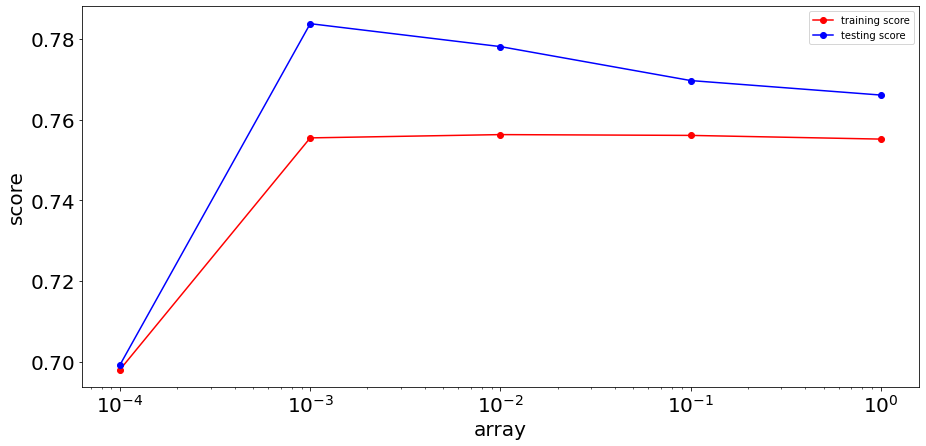

In [68]:
plt.figure(figsize = (15,7))
plt.plot(C_array_initial,training_array, color='r', marker = 'o', label='training score')
plt.plot(C_array_initial,test_array,  color='b', marker = 'o', label='testing score')
plt.legend()
plt.xscale('log' )

# make z and y ticks bigger
plt.xlabel('array', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

The optimal C seems to be somewhere around 0.001 so a `search window between 0.0001 and 0.01` is not a bad idea here!

# 1.3 Hyperparameter Tuning
### GridSearchCV (Optimal result since we have a very small dataset)
We’re now ready to perform hyperparameter tuning using GridSearchCV! Looking at the plot, the optimal C seems to be somewhere around 0.001 so a search window between 0.0001 and 0.01 is not a bad idea here.

Let’s first get setup with the right inputs for this. Use np.logspace() to obtain 100 values between 10^(-4) and 10^(-2) and define a dictionary of C values named tuning_C that can function as an input to GridSearchCV‘s parameter grid.

In [80]:
# search between 0.0001 and 100 in 100 values
C_array =  np.logspace(-4, 2, 100)

grid_params = [{'penalty' : ['l1','l2'],
                'C'       : C_array}]

In [81]:
lr_gs = LogisticRegression(solver = 'liblinear', max_iter = 1000)

In [82]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = lr_gs, 
                  param_grid = grid_params, 
                  scoring = 'f1',
                  cv = 5, )

# fit trainning dataset
gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid=[{'C': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.326...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02]),
                          'penalty': ['l1', 'l2']}],
             scoring='f1')

 Show best parameters

In [84]:
print(gs.best_params_, gs.best_score_)

{'C': 0.24770763559917114, 'penalty': 'l1'} 0.7606362896050173


Visualize

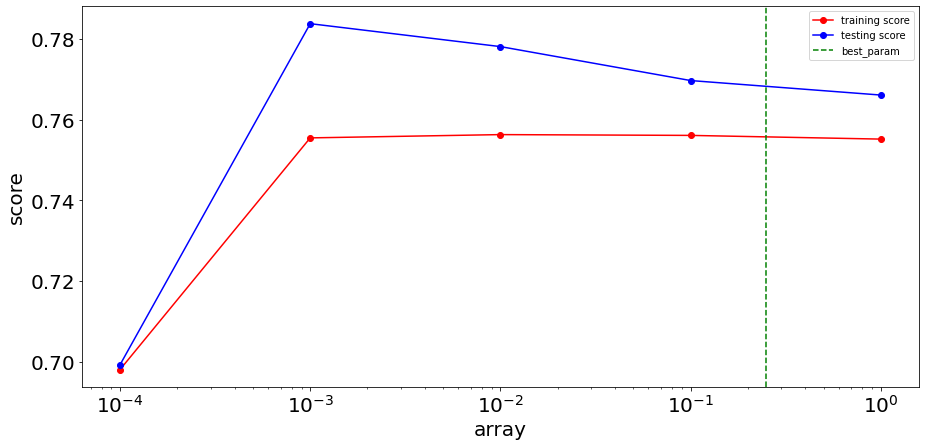

In [85]:
plt.figure(figsize = (15,7))
plt.plot(C_array_initial, training_array, color='r', marker = 'o', label='training score')
plt.plot(C_array_initial, test_array,  color='b', marker = 'o', label='testing score')
plt.xscale('log' )

# make z and y ticks bigger
plt.xlabel('array', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(x = gs.best_params_['C'], color ='green', linestyle = '--', label = 'best_param') 
plt.legend()
plt.show()

Fit the model again but this time were setting C to the best_params_ value

In [88]:
clf_gs_L2 = LogisticRegression(C = gs.best_params_['C'])
clf_gs_L2.fit(x_train,y_train)

# predition for training set using clf_best
y_pred_best_train = clf_gs_L2.predict(x_train)

# predition for test set using clf_best
y_pred_best = clf_gs_L2.predict(x_test)

# actual training values vs the predicted train value
l2_training_bestC = f1_score(y_train, y_pred_best_train)
# actual test values vs the predicted test value
l2_testing_bestC  = f1_score(y_test, y_pred_best)


print('Training score: ' + str(l2_training_bestC))
print('Testing score: ' + str(l2_testing_bestC))

Training score: 0.7551622418879056
Testing score: 0.7660818713450294


# 1.4 With Lasso Regularization

Instead of using `GridSearchCV`, we’re going to use `LogisticRegressionCV`. The syntax here is a little different. The arguments to LogisticRegressionCV that are relevant to us:

1. `Cs` : A list/array of C values to check; choose values between 0.01 and 100 here.
2. `cv` : Number of folds (5 is a good choice here!)
3. `penalty` : Remember to choose 'l1' for this!
4. `solver` : Recall that L1 penalty requires that we specify the solver to be ‘liblinear’.
5. `scoring` : 'f1' is still a great choice for a classifier.


`(Note that we’re not doing a train-test-validation split like last time!)`

In [378]:
from sklearn.linear_model import LogisticRegressionCV

In [379]:
# array from 0.01 to 100 in 100 values
C_array = np.logspace(-2,2,100)

# instance/object of LogisticRegressionCV
clf_l1 = LogisticRegressionCV(Cs=C_array, 
                              cv = 5, 
                              penalty = 'l1', 
                              scoring = 'f1', 
                              solver = 'liblinear')

# were fitting the original X and y not the training and testing set
# we also want this regularization to act as feature selection method
clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

The classifier has the attribute `C_` which prints the optimal C value. The attribute `coef_` gives us the coefficients of the best lasso-regularized classifier.

In [380]:
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)
# print(clf_l1.C_, clf_l1.scores_[1].mean(axis=0).max())

Best C value [0.25950242]
Best fit coefficients [[ 0.11641342 -0.55636692 -0.17266992  0.03123742 -0.17327147  0.20056789
  -0.50585429  0.         -0.07048796  0.43223601  0.94103361]]


# 1.5 Lasso as Feature Selection
Visualize the coefficients

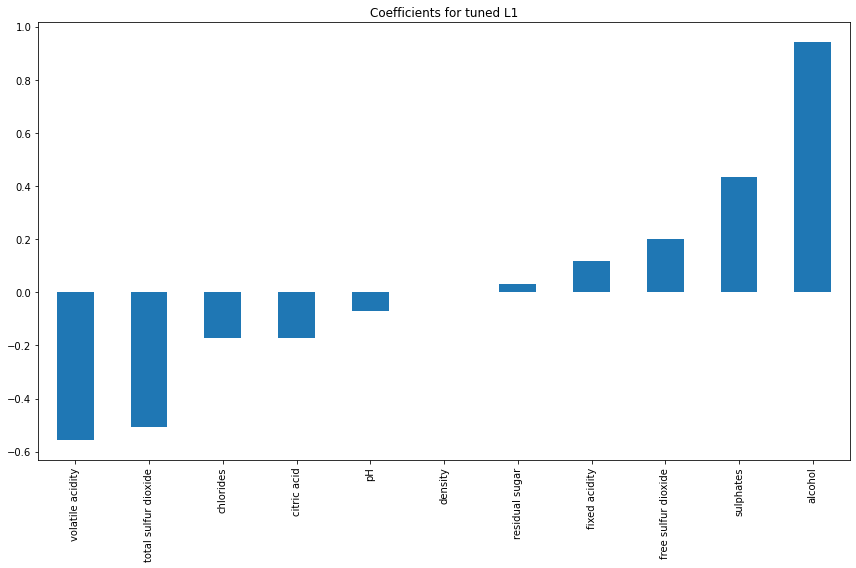

<Figure size 432x288 with 0 Axes>

In [381]:
predictors = features.columns

coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()

Notice how our L1 classifier has set one of the coefficients to zero! We’ve effectively eliminated one feature, density, from the model, thus using Lasso regularization as a feature selection method here.

Checking f1_score for L1 regularization, Remember that we do not fit the x_train and y_train in our clf_l1 model so, we will predict the whole X dataset

In [382]:
y_predict = clf_l1.predict(X)
l1_score = f1_score(y, y_predict)
print(l1_score)


# code for training and testing score incase we do fit the training dataset
# # predition for training set using clf_best
# y_pred_L1_train = clf_l1.predict(x_train)
# # predition for test set using clf_best
# y_pred_L1_test = clf_l1.predict(x_test)


# # actual training values vs the predicted train value
# print(f1_score(y_train, y_pred_L1_train))
# # actual test values vs the predicted test value
# print(f1_score(y_test, y_pred_L1_test))

0.7581699346405228


# 1.6 Summary

In [383]:
# hide/show
print('F1 scores:')
print('\n')
print('Default model (L2):')
print('Training score: ', + l2_training)
print('Testing score: ',  + l2_testing)
print('\n')
print('L2 model w/ best C parameter:')
print('Training score: ' + str(l2_training_bestC))
print('Testing score: ' + str(l2_testing_bestC))
print('\n')
print('L1 model w/out spliting our dataset:')
print(l1_score)

F1 scores:


Default model (L2):
Training score:  0.7551622418879056
Testing score:  0.7660818713450294


L2 model w/ best C parameter:
Training score: 0.7498367080339646
Testing score: 0.7763496143958869


L1 model w/out spliting our dataset:
0.7581699346405228


<br>
<br>

***

# 2. Linear Regression Model

In [384]:
from sklearn.linear_model import LinearRegression

##### Building linear regression model


Let's inspect our dataset and define what will be our features and target for our linear regression model using RFE.

Feature Selection (RFE)

In [385]:
# Define features and y
y = df['alcohol']
features = df.drop(columns = ['alcohol'])

In [386]:
# Input variable here for FRE:
number_of_features = 8
scoring_method = 'r2'

In [387]:
# Setting a varible 'X_standard' so that our original X features will remain unaffected if we rerun this code.
X_standard = StandardScaler().fit_transform(features)
    
rfe = RFE(lr, n_features_to_select=number_of_features)
    
rfe.fit(X_standard,y)
    
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print('RFE selected features:')
X_rfe = rfe_features
print(X_rfe)
print('\nrfe score: '+ str(rfe.score(X_standard,y)))

RFE selected features:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'sulphates', 'quality']

rfe score: 0.680959680262835


In [388]:
# Define X and y
y = df['alcohol']
# Using the features slected by RFE
X = df[X_rfe]

x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Checking r2 score for linear regression model

In [389]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6644000334306605
0.7154031602401427


Our linear regression score seems good and not overfit, but for the sake of this activity let's perform Ridge and Lasso regularizations.

# 2.1 Lasso Regularization for Linear Model 

##### Check for the best alpha using gridseachcv

In [390]:
## an array of alpha values between 0.000001 and .001
alpha_array = np.logspace(-6, -3, 50)
 
#dict with key (alpha) and values being alpha_array
tuned_parameters = [{'alpha': alpha_array}]

In [391]:
from sklearn.model_selection import GridSearchCV

gs_l1 = GridSearchCV(estimator = Lasso(), 
                     param_grid = tuned_parameters, 
                     scoring = 'neg_mean_squared_error',
                     cv = 5, 
                     return_train_score = True)

# Gridsearch fit X and y
gs_l1.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-06, 1.15139540e-06, 1.32571137e-06, 1.52641797e-06,
       1.75751062e-06, 2.02358965e-06, 2.32995181e-06, 2.68269580e-06,
       3.08884360e-06, 3.55648031e-06, 4.09491506e-06, 4.71486636e-06,
       5.42867544e-06, 6.25055193e-06, 7.19685673e-06, 8.28642773e-06,
       9.54095476e-06, 1.09854114e-05, 1.26485522e-05, 1...
       5.17947468e-05, 5.96362332e-05, 6.86648845e-05, 7.90604321e-05,
       9.10298178e-05, 1.04811313e-04, 1.20679264e-04, 1.38949549e-04,
       1.59985872e-04, 1.84206997e-04, 2.12095089e-04, 2.44205309e-04,
       2.81176870e-04, 3.23745754e-04, 3.72759372e-04, 4.29193426e-04,
       4.94171336e-04, 5.68986603e-04, 6.55128557e-04, 7.54312006e-04,
       8.68511374e-04, 1.00000000e-03])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [392]:
gs_l1.best_params_['alpha'], gs.best_score_

(1.0985411419875572e-05, 0.7578325522862687)

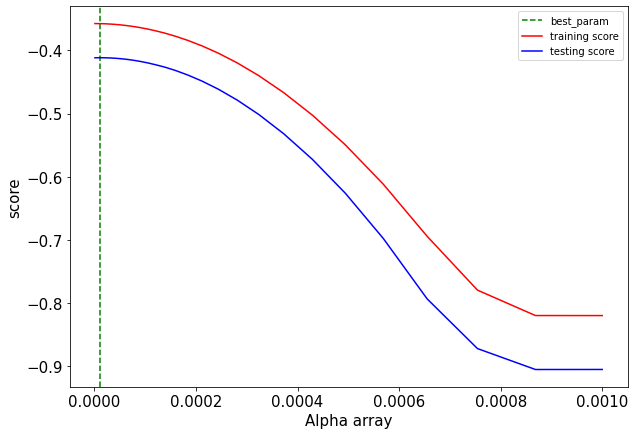

In [393]:
# Visualize
test_scores = gs_l1.cv_results_['mean_test_score']
train_scores = gs_l1.cv_results_['mean_train_score']

plt.figure(figsize=(10, 7)) 

plt.xlabel('Alpha array', fontsize=15)
plt.ylabel('score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axvline(x = gs_l1.best_params_['alpha'], color ='green', linestyle = '--', label = 'best_param') 

plt.plot(alpha_array, train_scores, color='r', label='training score')
plt.plot(alpha_array, test_scores, color='b', label='testing score' )

plt.legend()

##### Fitting lasso regression model

In [394]:
lasso = Lasso(alpha = gs_l1.best_params_['alpha'])
lasso.fit(x_train, y_train)

Lasso(alpha=1.0985411419875572e-05)

##### Lasso R2 score

In [395]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.6644000303415452
0.7154027878983547


# 2.2 Ridge Regularization for Linear Model

In [396]:

alpha_array = np.logspace(-2, .2, 50)
 
#dict with key (alpha) and values being alpha_array
tuned_parameters = [{'alpha': alpha_array}]

In [397]:
gs_l2 = GridSearchCV(estimator = Ridge(), 
                     param_grid = tuned_parameters, 
                     scoring = 'neg_mean_squared_error',
                     cv = 5, 
                     return_train_score = True)

# Gridsearch fit X and y
gs_l2.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([0.01      , 0.01108914, 0.01229691, 0.01363622, 0.01512139,
       0.01676833, 0.01859464, 0.02061986, 0.02286566, 0.02535605,
       0.02811769, 0.0311801 , 0.03457606, 0.03834189, 0.04251786,
       0.04714866, 0.05228382, 0.05797828, 0.06429294, 0.07129535,
       0.07906043, 0.08767124, 0.09721988, 0.10780851, 0.1195504 ,
       0.13257114, 0.14701002, 0.1630215 , 0.18077687, 0.20046604,
       0.22229965, 0.24651124, 0.27335983, 0.30313261, 0.33614806,
       0.37275937, 0.41335817, 0.45837876, 0.50830274, 0.56366414,
       0.62505519, 0.6931326 , 0.76862461, 0.85233877, 0.9451706 ,
       1.04811313, 1.16226758, 1.28885506, 1.42922973, 1.58489319])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [398]:
gs_l1.best_params_['alpha'], gs.best_score_

(1.0985411419875572e-05, 0.7578325522862687)

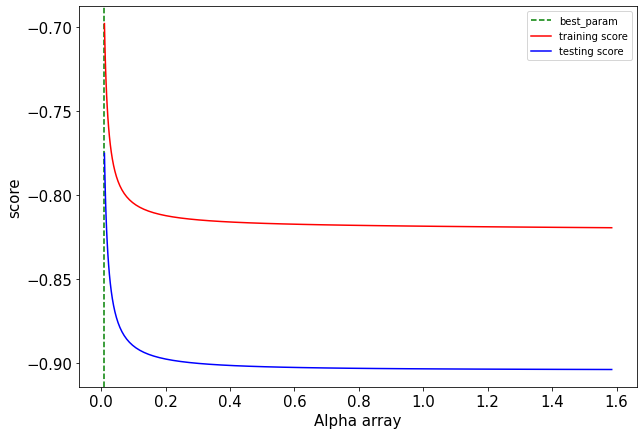

In [399]:
test_scores = gs_l2.cv_results_['mean_test_score']
train_scores = gs_l2.cv_results_['mean_train_score']

plt.figure(figsize=(10, 7)) 

plt.xlabel('Alpha array', fontsize=15)
plt.ylabel('score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axvline(x = gs_l2.best_params_['alpha'], color ='green', linestyle = '--', label = 'best_param') 

plt.plot(alpha_array, train_scores, color='r', label='training score')
plt.plot(alpha_array, test_scores, color='b', label='testing score' )

plt.legend()

##### Fitting Ridge regression model

In [400]:
ridge = Ridge(alpha = gs_l2.best_params_['alpha'])
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

#### Ridge R2 score

In [401]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.664400032228174
0.7154026140230934


# 2.3 Summary

In [402]:
# hide/show
print('r2 scores:')
print('\n')
print('Default linear regression:')
print('Training score: ', + lr.score(x_train,y_train))
print('Testing score: ',  + lr.score(x_test,y_test))
print('\n')
print('Lasso:')
print('Training score: ' + str(lasso.score(x_train,y_train)))
print('Testing score: ' + str(lasso.score(x_test,y_test)))
print('\n')
print('Ridge:')
print('Training score: ' + str(ridge.score(x_train,y_train)))
print('Testing score: ' + str(ridge.score(x_test,y_test)))

r2 scores:


Default linear regression:
Training score:  0.6644000334306605
Testing score:  0.7154031602401427


Lasso:
Training score: 0.6644000303415452
Testing score: 0.7154027878983547


Ridge:
Training score: 0.664400032228174
Testing score: 0.7154026140230934


# 3. Conclusion

There's not much significant change in regularization resuslts for both our Logistic and Linear model, That's because our dataset is not overfit. We demostrate how to use this regularization techniques and therefore we can use this as reference for our future activity. 

\- fin